This notebook is the second analysis of the cluster NGC 1027 that I have made just to use the parameters obtained to filter the data. The difference is that we use windows of proper motion, position and parallax to filter data, based on the initial statistical analysis of the data.

We have utilized a table mixed of the vizier and gaia for utilizing the column "phot_bp_rp_excess_factor_corr" that can only be obtained with a query in gaia site and is necessary to apply a quality filter.

We also do some filters in the data in here.

Each step of the analysis is documented here.

In [104]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from cluster_tools import corr_plx, quality_filter, movprop_filter, quality2_filter, movprop_stat_filter

In [105]:
data = ascii.read("vizier&gaia_ngc1027")
data

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM_1,pmRA_1,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE_1,Gmag,BPmag,RPmag,BP-RP,RV,e_RV,ELAT,RAJ2000,DEJ2000,phot_bp_rp_excess_factor_2a,phot_bp_rp_excess_factor_corr
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
40.752872,60.619717,464811909213194880,0.1134,0.1531,0.0203,0.2078,0.574,-0.121,0.2,-0.561,0.219,95,0.0,1.2934,1.04,18.937899,20.169657,17.902548,2.267109,0.0,0.0,42.228107,40.752872,60.61972,1.3255454,-0.04710397
40.75481,60.622272,464811913515390080,0.0533,0.0723,0.4579,0.0959,1.179,-1.13,0.092,-0.337,0.102,31,1.288,0.0,0.995,17.785736,19.059893,16.697773,2.36212,0.0,0.0,42.230053,40.75482,60.622272,1.3708488,-0.015574738
41.2338,60.6531,464815177690629760,0.0379,0.0474,1.9898,0.0672,17.653,16.934,0.064,-4.987,0.063,31,1.327,0.0,1.007,17.101713,18.172352,16.090834,2.081518,0.0,0.0,42.163055,41.233646,60.653122,1.3385104,-0.0077436185
41.24508,60.656677,464815207748179712,0.0838,0.1046,0.127,0.1474,1.565,-1.268,0.139,0.918,0.139,31,1.329,0.0,1.009,18.457813,19.480236,17.487959,1.992277,0.0,0.0,42.164097,41.24509,60.65667,1.3111928,-0.022662826
41.249058,60.66426,464815207748196224,0.118,0.1545,0.3512,0.2202,0.984,-0.794,0.196,0.58,0.196,31,1.312,0.0,1.026,18.878328,20.02486,17.843283,2.181578,0.0,0.0,42.17025,41.249065,60.664257,1.3442822,-0.016109712
41.253258,60.65717,464815212050367232,0.1159,0.1445,0.0177,0.2087,1.479,1.032,0.194,-1.059,0.195,95,0.0,1.2567,1.024,18.92627,20.084536,17.877174,2.207361,0.0,0.0,42.162933,41.25325,60.657173,1.355795,-0.008276298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.748802,62.46813,467324327643165696,0.0275,0.0337,0.3117,0.0455,1.293,-1.145,0.044,-0.601,0.049,31,1.501,0.0,0.913,16.359606,16.811813,15.731024,1.08079,0.0,0.0,43.721092,41.748814,62.468132,1.2291812,0.004674035
41.756607,62.47207,467324327643169024,0.128,0.1619,0.4471,0.2148,1.345,-1.279,0.203,0.416,0.229,31,1.416,0.0,0.996,18.997805,19.672403,18.143816,1.528587,0.0,0.0,43.723206,41.75662,62.47207,1.3138964,0.0402783


In [5]:
#data.rename_column('RUWE_1', 'RUWE') 
#data.rename_column('pmRA_1', 'pmRA') 

We will apply a filter in proper motion, limiting our data in a box with +1 and -1 around the value of the proper motion of the cluster of SIMBAD.

In [3]:
pmra_1analysis = -1.77495118
pmde_1analysis = 1.99721932
dev_pmra = 0.15
dev_pmde = 0.19
L_window=3.

In [6]:
data_mov = movprop_stat_filter(data,pmra_1analysis,pmde_1analysis,dev_pmra,dev_pmde,L_window,"vizier")
len(data_mov)

1475

Correcting the parallax.

In [7]:
data_plx = corr_plx(data_mov,"vizier")
len(data_plx)

1475

Applying quality filter in ruwe.

In [8]:
data_qual = quality2_filter(data_plx)
len(data_qual)

1332

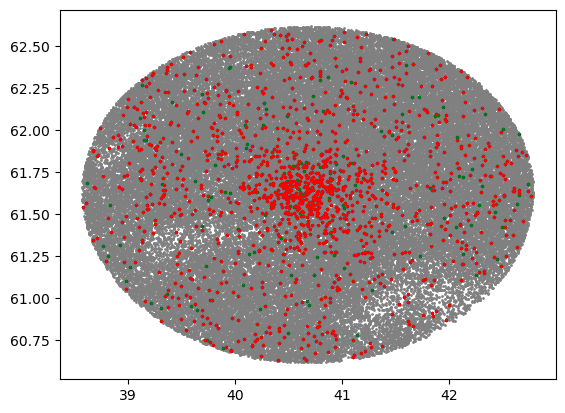

In [8]:
fig, ax = plt.subplots()
ax.scatter(data["RAJ2000"], data["DEJ2000"], color='gray', s=1)
ax.scatter(data_mov["RAJ2000"], data_mov["DEJ2000"],color = 'blue', s=2)
ax.scatter(data_plx["RAJ2000"], data_plx["DEJ2000"],color = 'green', s=2)
ax.scatter(data_qual["RAJ2000"], data_qual["DEJ2000"],color = 'red', s=2)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)

Text(0.5, 0, 'pmra')

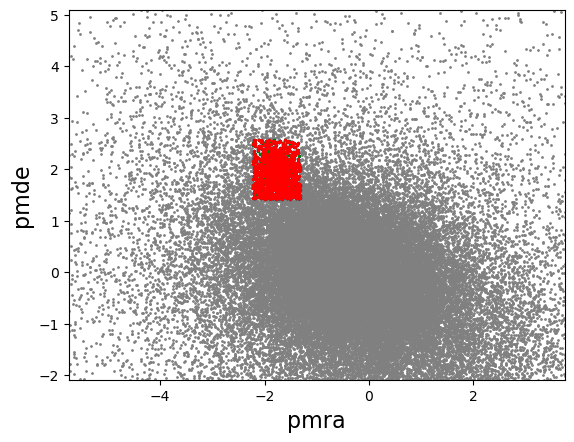

In [9]:
fig, ax = plt.subplots()
ax.scatter(data["pmRA"], data["pmDE"], color='gray', s=1)
ax.scatter(data_mov["pmRA"], data_mov["pmDE"],color = 'blue', s=2)
ax.scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'green', s=2)
ax.scatter(data_qual["pmRA"], data_qual["pmDE"],color = 'red', s=2)
ax.set_xlim(-5.75,3.75)
ax.set_ylim(-2.09,5.09)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)

Limiting the parallax, around the value of simbad.

In [46]:
ll, = np.where((data_qual["Plx_corr"] < 1.0)&(data_qual["Plx_corr"] > 0.6))

In [47]:
data_final = data_qual[ll]
len(data_final)

602

Text(0.5, 0, 'pmra (mas/yr)')

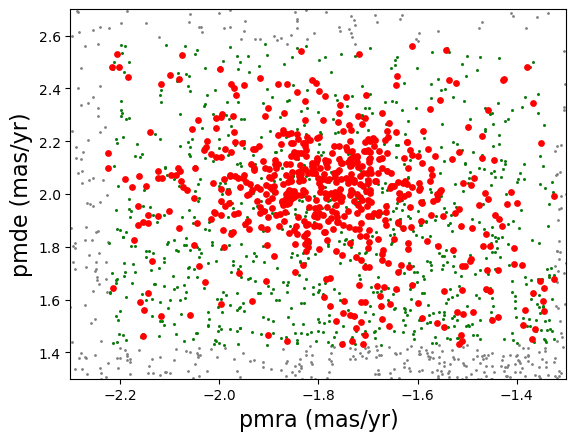

In [31]:
fig, ax = plt.subplots()
ax.scatter(data["pmRA"], data["pmDE"], color='gray', s=1,label= 'Dados com corr')
ax.scatter(data_mov["pmRA"], data_mov["pmDE"],color = 'green', s=1,label="Filtro mov prop")
#ax.scatter(data_qual["pmRA"], data_qual["pmDE"],color = 'lightblue', s=2)
ax.scatter(data_final["pmRA"], data_final["pmDE"],color = 'red', s=15, label="População final")
ax.set_xlim(-2.3,-1.3)
ax.set_ylim(1.3,2.7)
ax.set_ylabel("pmde (mas/yr)",fontsize=16)
ax.set_xlabel("pmra (mas/yr)",fontsize=16)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)
#plt.legend(alpha=0.5)

Text(0.5, 0, 'RA (dec)')

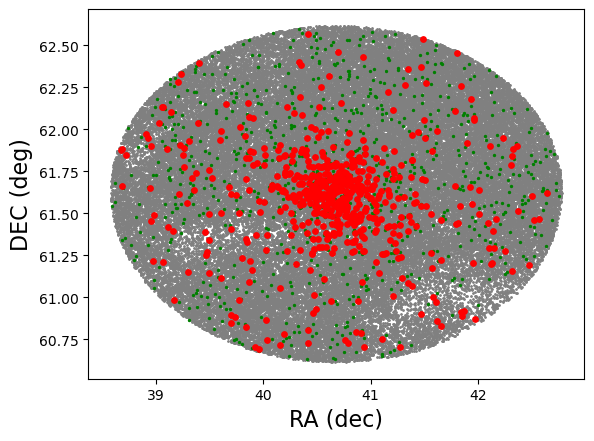

In [32]:
fig, ax = plt.subplots()
ax.scatter(data["RAJ2000"], data["DEJ2000"], color='gray', s=1)
ax.scatter(data_mov["RAJ2000"], data_mov["DEJ2000"],color = 'green', s=2)
ax.scatter(data_final["RAJ2000"], data_final["DEJ2000"],color = 'red', s=15)
#ax.set_xlim(38.,42.)
#ax.set_ylim(59.,63.)
ax.set_ylabel("DEC (deg)",fontsize=16)
ax.set_xlabel("RA (dec)",fontsize=16)

Applying the correction of the Paralaxes according to [Lindegren 2021](https://www.aanda.org/articles/aa/full_html/2021/05/aa39653-20/aa39653-20.html) .

Text(0.5, 0, 'pmra')

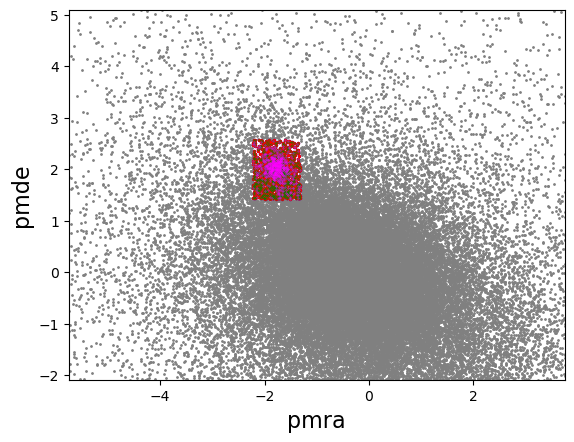

In [12]:
fig, ax = plt.subplots()
ax.scatter(data["pmRA"], data["pmDE"], color='gray', s=1)
ax.scatter(data_mov["pmRA"], data_mov["pmDE"],color = 'blue', s=2)
ax.scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'red', s=2)
ax.scatter(data_qual["pmRA"], data_qual["pmDE"],color = 'green', s=0.1)
ax.scatter(data_final["pmRA"], data_final["pmDE"],color = 'magenta', s=0.1)
#ax.scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'green', s=0.1)
ax.set_xlim(-5.75,3.75)
ax.set_ylim(-2.09,5.09)
ax.set_ylabel("pmde",fontsize=16)
ax.set_xlabel("pmra",fontsize=16)
#ax.scatter(data_clu1["RAJ2000"], data_clu1["DEJ2000"],color = 'red', s=18)

Now we make the different filters correspond to restricted populations each one.

In [10]:
x_max = -1.77495118 + L_window*dev_pmra
x_min = -1.77495118 - L_window*dev_pmra
y_max = 1.99721932 + L_window*dev_pmde
y_min = 1.99721932 - L_window*dev_pmde

(-2.2249511799999997, -1.32495118)

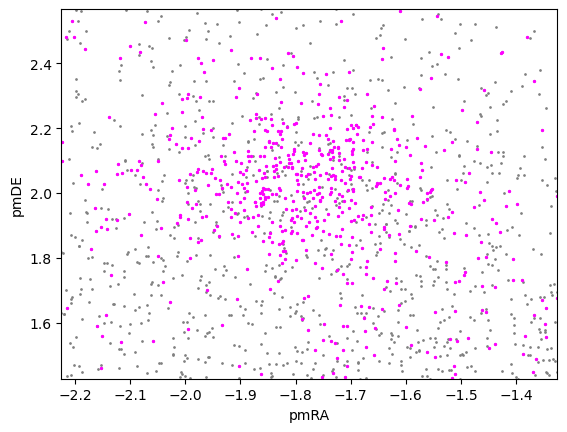

In [11]:
fig, ax = plt.subplots()
ax.scatter(data["pmRA"], data["pmDE"],color = 'grey', s=0.9)
#ax.scatter(data_mov["pmRA"], data_mov["pmDE"],color = 'blue', s=0.8)
#ax.scatter(data_plx["pmRA"], data_plx["pmDE"],color = 'green', s=0.8)
#ax.scatter(data_qual["pmRA"], data_qual["pmDE"],color = 'red', s=0.8)
ax.scatter(data_final["pmRA"], data_final["pmDE"],color = 'magenta', s=2.)
ax.set_xlabel("pmRA")
ax.set_ylabel("pmDE")
ax.set_ylim(y_min,y_max)
ax.set_xlim(x_min,x_max)


Text(0, 0.5, 'DEC')

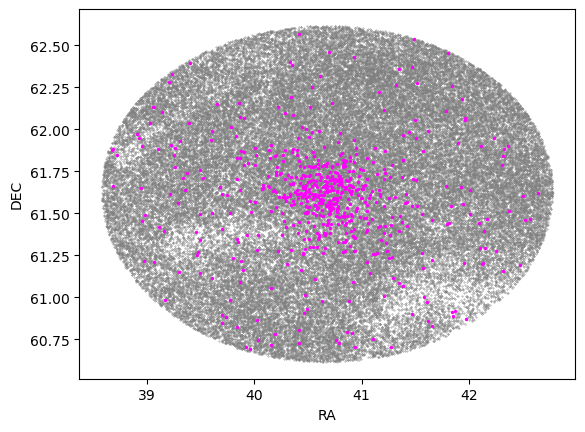

In [12]:
fig, ax = plt.subplots()
ax.scatter(data["RAJ2000"], data["DEJ2000"],color = 'grey', s=0.1)
#ax.scatter(data_mov["RAJ2000"], data_mov["DEJ2000"],color = 'blue', s=0.8)
#ax.scatter(data_plx["RAJ2000"], data_plx["DEJ2000"],color = 'green', s=0.8)
#ax.scatter(data_qual["RAJ2000"], data_qual["DEJ2000"],color = 'red', s=0.8)
ax.scatter(data_final["RAJ2000"], data_final["DEJ2000"],color = 'magenta', s=2.)
ax.set_xlabel("RA")
ax.set_ylabel("DEC")


Text(0, 0.5, 'G')

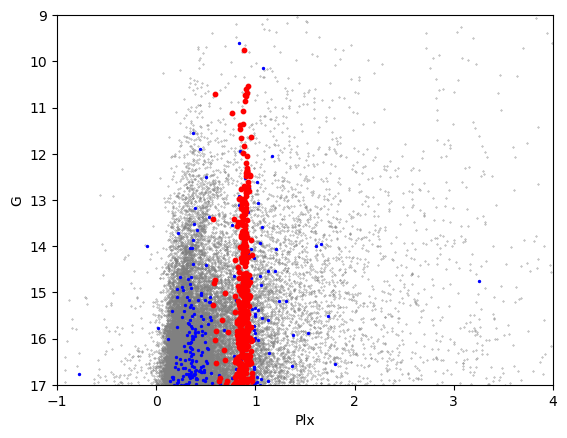

In [38]:
fig, ax = plt.subplots()
ax.scatter(data["Plx"], data["Gmag"],color = 'grey', s=0.1)
ax.scatter(data_mov["Plx"], data_mov["Gmag"],color = 'blue', s=2.)
#ax.scatter(data_plx["Plx"], data_plx["Gmag"],color = 'green', s=2.)
#ax.scatter(data_qual["Plx"], data_qual["Gmag"],color = 'red', s=0.8)
ax.scatter(data_final["Plx"], data_final["Gmag"],color = 'red', s=10.)
ax.set_ylim(17,9)
ax.set_xlim(-1,4)
ax.set_xlabel("Plx")
ax.set_ylabel("G")



Text(0.5, 0, 'Plx (mas)')

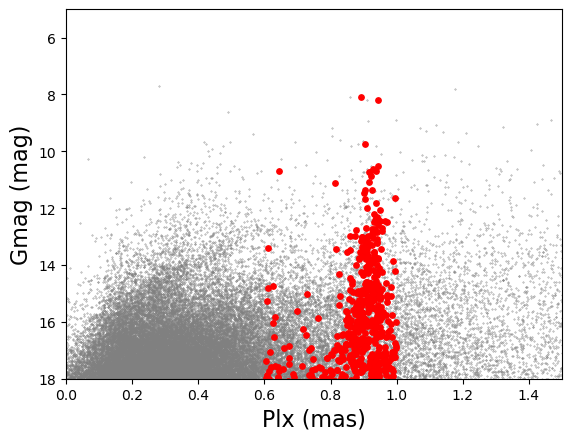

In [53]:
fig, ax = plt.subplots()
ax.scatter(data["Plx"], data["Gmag"],color = 'grey', s=0.1)
#ax.scatter(data_mov["Plx"], data_mov["Gmag"],color = 'green', s=2.)
ax.scatter(data_final["Plx_corr"], data_final["Gmag"],color = 'red', s=15.)
ax.set_xlim(0.,1.5)
ax.set_ylim(18.,5.)
ax.set_ylabel("Gmag (mag)",fontsize=16)
ax.set_xlabel("Plx (mas)",fontsize=16)
#plt.legend()

## Histograms

In [54]:
def gaussian(x, a1, mu1, sigma1):
    return (a1 * np.exp(-(x - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi)))

### Positions (RA,DEC)

We are making the analysis in the data_qual population.

In [55]:
population = data_final

In [56]:
hist_ra, bin_edges_ra = np.histogram(population["RAJ2000"], bins=30)
hist_de, bin_edges_de = np.histogram(population["DEJ2000"], bins=30)

# take the centers of the bins 
bin_centers_ra = (bin_edges_ra[:-1] + bin_edges_ra[1:]) / 2
bin_centers_de = (bin_edges_de[:-1] + bin_edges_de[1:]) / 2

# parameters
initial_guess_ra = [1, np.mean(population["RAJ2000"]), np.std(population["RAJ2000"])]
initial_guess_de = [1, np.mean(population["DEJ2000"]), np.std(population["DEJ2000"])]

# adjust the gaussians
params_ra, _ = curve_fit(gaussian, bin_centers_ra, hist_ra, p0=initial_guess_ra)
params_de, _ = curve_fit(gaussian, bin_centers_de, hist_de, p0=initial_guess_de)

In [57]:
params_ra

array([10.58404455, 40.66911821,  0.05615086])

In [61]:
np.sqrt(params_ra[2])

0.23696172620214512

In [58]:
params_de

array([3.18795574e+00, 6.16175840e+01, 1.87942160e-02])

In [62]:
np.sqrt(params_de[2])

0.1370919982037267

In [59]:
a1,mu1,sigma1= params_ra[0], params_ra[1], params_ra[2]
a2,mu2,sigma2= params_de[0], params_de[1], params_de[2]

x_ra = np.linspace(min(population["RAJ2000"]), max(population["RAJ2000"]), 100)
x_de = np.linspace(min(population["DEJ2000"]), max(population["DEJ2000"]), 100)

gaus1=a1 * np.exp(-(x_ra - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi))
gaus2=a2 * np.exp(-(x_de - mu2)**2 / (2 * sigma2*2)) / (sigma2 * np.sqrt(2 * np.pi))

Text(40.9, 62.41, '$\\mu_{DEC} = 61.61$, $\\sigma_{DEC}= 0.13$')

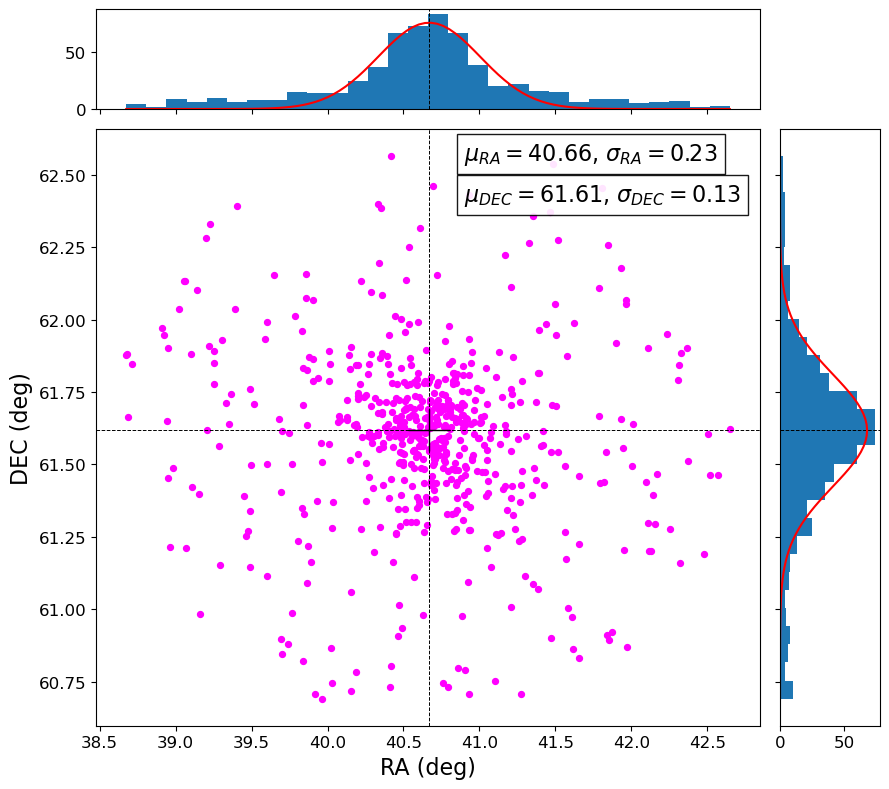

In [63]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(9,8),tight_layout=True)

ax.scatter(population["RAJ2000"],population["DEJ2000"],color = 'magenta', s=18)
ax.plot(params_ra[1], params_de[1], marker='+', color="k", markersize=30)
ax.axvline(params_ra[1],color='k',lw=0.7,ls='--')
ax.axhline(params_de[1],color='k',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.hist(pop_rad4["RAJ2000"], bins=30)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population["RAJ2000"], bins=30)
ax_histx.plot(x_ra,gaus1,color='r')
ax_histx.axvline(params_ra[1],color='k',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='k',lw=0.7,ls='--')
#ax_histx.plot(x_ra,gaus1,color='r',label=r"$\mu_1 = 225.98$, $\sigma_1= 0.0075$ ")
ax_histy.hist(population["DEJ2000"], bins=30, orientation='horizontal')
ax_histy.plot(gaus2,x_de,color='r')
#ax_histy.plot(gaus2,x_de,color='r',label=r"$\mu_2 = -54.35$, $\sigma_2= 0.0027$ ")
# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)
ax.text(40.9,62.55, r"$\mu_{RA} = 40.66$, $\sigma_{RA}= 0.23$", bbox={'facecolor':'white','alpha': 0.9, 'pad': 5},fontsize=16)
ax.text(40.9,62.41, r"$\mu_{DEC} = 61.61$, $\sigma_{DEC}= 0.13$", bbox={'facecolor':'white','alpha': 0.9, 'pad':5},fontsize=16)

### Proper Motion (pmRA,pmDE)

In [64]:
hist_pmra, bin_edges_pmra = np.histogram(population["pmRA"], bins=30)
hist_pmde, bin_edges_pmde = np.histogram(population["pmDE"], bins=30)

# take the centers of the bins 
bin_centers_pmra = (bin_edges_pmra[:-1] + bin_edges_pmra[1:]) / 2
bin_centers_pmde = (bin_edges_pmde[:-1] + bin_edges_pmde[1:]) / 2

# parameters
initial_guess_pmra = [1, np.mean(population["pmRA"]), np.std(population["pmRA"])]
initial_guess_pmde = [1, np.mean(population["pmDE"]), np.std(population["pmDE"])]

# adjust the gaussians
params_pmra, _ = curve_fit(gaussian, bin_centers_pmra, hist_pmra, p0=initial_guess_pmra)
params_pmde, _ = curve_fit(gaussian, bin_centers_pmde, hist_pmde, p0=initial_guess_pmde)

In [65]:
params_pmra

array([ 1.34379594, -1.77417282,  0.01237206])

In [69]:
np.sqrt(params_pmra[2])

0.11122974317616817

In [67]:
params_pmde

array([1.63347203, 2.0287421 , 0.01313568])

In [70]:
np.sqrt(params_pmde[2])

0.11461098119160734

In [71]:
a1,mu1,sigma1= params_pmra[0], params_pmra[1], params_pmra[2]
a2,mu2,sigma2=  params_pmde[0], params_pmde[1], params_pmde[2]

x_pmra = np.linspace(min(population["pmRA"]), max(population["pmRA"]), 100)
x_pmde = np.linspace(min(population["pmDE"]), max(population["pmDE"]), 100)

gaus1=a1 * np.exp(-(x_pmra - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi))
gaus2=a2 * np.exp(-(x_pmde - mu2)**2 / (2 * sigma2*2)) / (sigma2 * np.sqrt(2 * np.pi))

Text(-1.76, 2.465, '$\\mu_{pmde} = \\ \\ \\ 2.02$, $\\sigma_{pmde}= 0.114$')

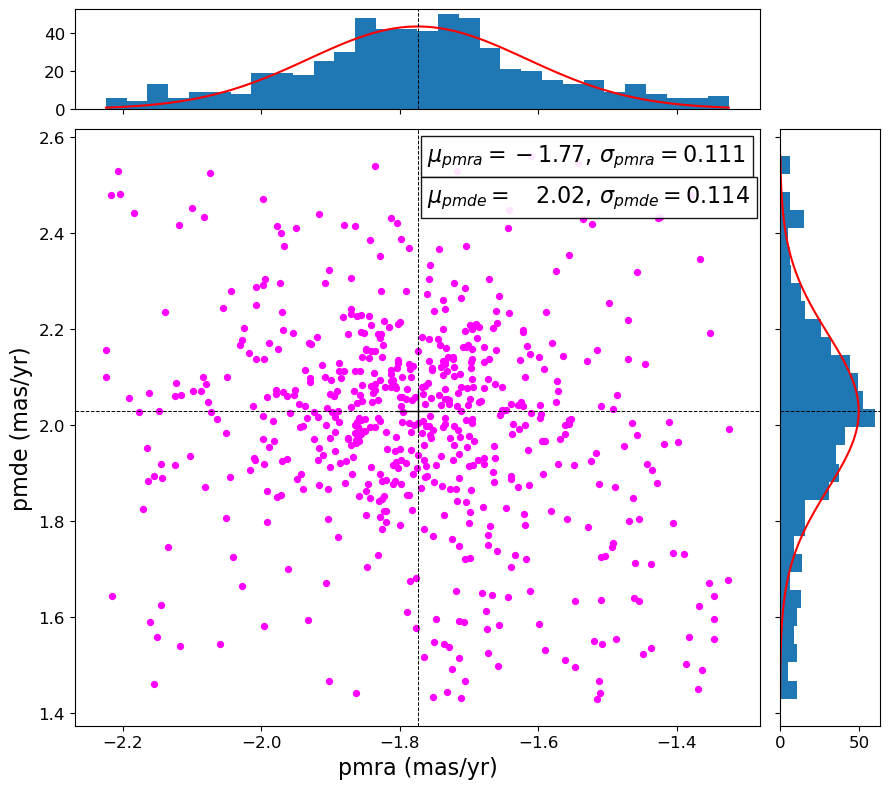

In [86]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(9,8),tight_layout=True)

ax.scatter(population["pmRA"],population["pmDE"],color = 'magenta', s=18)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="k", markersize=30)
ax.axvline(params_pmra[1],color='k',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='k',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.hist(population["RAJ2000"], bins=30)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population["pmRA"], bins=30)
ax_histx.plot(x_pmra,gaus1,color='r')
ax_histx.axvline(params_pmra[1],color='k',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='k',lw=0.7,ls='--')
#ax_histx.plot(x_pmra,gaus1,color='r',label=r"$\mu_1 = -7.47$, $\sigma_1= 0.017$ ")
ax_histy.hist(population["pmDE"], bins=30, orientation='horizontal')
ax_histy.plot(gaus2,x_pmde,color='r')
#ax_histy.plot(gaus2,x_pmde,color='r',label=r"$\mu_2 =  -5.50$, $\sigma_2= 0.019$ ")
# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)
ax.text(-1.76,2.55, r"$\mu_{pmra} = -1.77$, $\sigma_{pmra}= 0.111$", bbox={'facecolor':'white','alpha': 0.9, 'pad': 5},fontsize=16)
ax.text(-1.76,2.465, r"$\mu_{pmde} = \ \ \ 2.02$, $\sigma_{pmde}= 0.114$", bbox={'facecolor':'white','alpha': 0.9, 'pad':5},fontsize=16)

### Parallax (Plx)

We're using the paralax without correcion firstly.

In [87]:
np.mean(population["Plx_corr"][para])

0.8729351245847176

In [107]:
np.median(population["Plx_corr"])

0.903201

In [108]:
#paralaxe_sel = np.isfinite(population["Plx_corr"])

In [109]:
hist_plx, bin_edges_plx = np.histogram(population["Plx_corr"], bins=30)

# take the centers of the bins 
bin_centers_plx = (bin_edges_plx[:-1] + bin_edges_plx[1:]) / 2

# parameters
initial_guess_plx = [1, np.mean(population["Plx_corr"]), np.std(population["Plx_corr"])]

# adjust the gaussians
params_plx, _ = curve_fit(gaussian, bin_centers_plx, hist_plx, p0=initial_guess_plx)

In [110]:
params_plx

array([0.15945161, 0.91696266, 0.00109025])

In [94]:
np.sqrt(params_plx[2])

0.03301895071236689

In [91]:
a1,mu1,sigma1= params_plx[0], params_plx[1], params_plx[2]

x_plx = np.linspace(min(population["Plx_corr"]), max(population["Plx_corr"]), 100)

gaus1=a1 * np.exp(-(x_plx - mu1)**2 / (2 * sigma1*2)) / (sigma1 * np.sqrt(2 * np.pi))

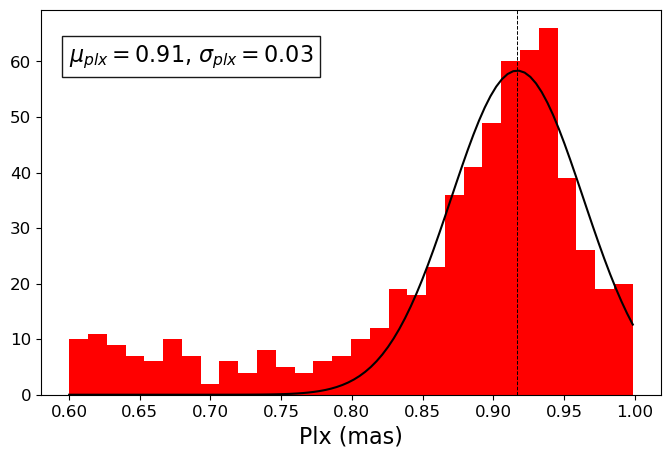

In [97]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population["Plx_corr"][paralaxe_sel],30, color="red")
ax.axvline(params_plx[1],color='k',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus1, 'k')
ax.text(0.6,60, r"$\mu_{plx} = 0.91$, $\sigma_{plx}= 0.03$", bbox={'facecolor':'white','alpha': 0.9, 'pad':5},fontsize=16)
#ax.plot(x_plx, gaus1, 'k',label=r"$\mu_1 = 1.24$, $\sigma_1= 0.000992$ ")
#ax.axvline
#ax.axhline
#plt.gca().invert_xaxis()
#fig.legend(fontsize=13,bbox_to_anchor=(0.5, 0.88))
#plt.savefig("hist_Mvt.png", dpi=150)
ax.tick_params(axis='both', which='major', labelsize=12)

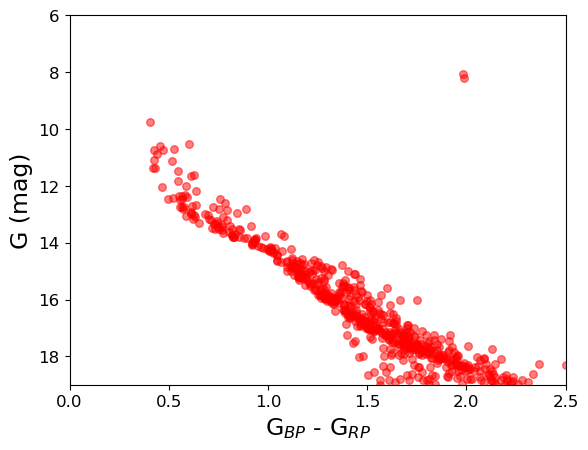

In [102]:
fig, ax = plt.subplots()
img=ax.scatter(data_final["BP-RP"],data_final["Gmag"], color='red',alpha=0.5,s=30)
ax.set_ylabel("G (mag)",fontsize=17)
ax.set_xlabel(r"G$_{BP}$ - G$_{RP}$",fontsize=17)
ax.set_ylim(19,6)
ax.set_xlim(0,2.5)
#cbar = plt.colorbar(img,orientation="vertical",shrink=0.9)
#cbar.set_label("Probs",fontsize=15,rotation=270, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=12)

In [111]:
len(data_final)

602

Filtering paralax in a window, the way we did it with proper motion.

In [30]:
dv_plx = np.sqrt(params_plx[2])
dv_plx

0.03301895071236689

In [31]:
sigma_plx = 0.033

In [32]:
window=3.

In [34]:
L_plx = window*sigma_plx

In [37]:
plx_cluster = 0.91696266

In [35]:
plx_pop = population["Plx_corr"]

In [38]:
kk, = np.where((plx_pop > plx_cluster - L_plx)&(plx_pop < plx_cluster + L_plx))

In [40]:
len(population["Plx_corr"][kk])

487

Text(0.5, 0, 'Plx (mas)')

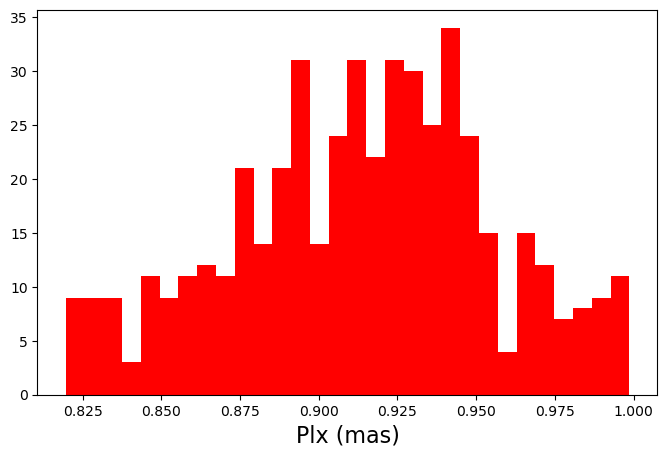

In [42]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population["Plx_corr"][kk],30, color="red")
ax.set_xlabel("Plx (mas)",fontsize=16)
#ax.plot(x_plx, gaus1, 'k')
#ax.plot(x_plx, gaus1, 'k',label=r"$\mu_1 = 1.24$, $\sigma_1= 0.000992$ ")
#ax.axvline
#ax.axhline
#plt.gca().invert_xaxis()
#fig.legend(fontsize=13,bbox_to_anchor=(0.5, 0.88))
#plt.savefig("hist_Mvt.png", dpi=150)

## Saving the final data

In [59]:
len(data_final)

602

In [60]:
#ascii.write(data_final, 'catalogue_ngc1027.csv', format='csv', fast_writer=False)  

In [43]:
hist_plx, bin_edges_plx = np.histogram(population["Plx_corr"][paralaxe_sel], bins=30)

# take the centers of the bins 
bin_centers_plx = (bin_edges_plx[:-1] + bin_edges_plx[1:]) / 2

# parameters
initial_guess_plx = [1, np.mean(population["Plx_corr"][paralaxe_sel]), np.std(population["Plx_corr"][paralaxe_sel])]

# adjust the gaussians
params_plx, _ = curve_fit(gaussian, bin_centers_plx, hist_plx, p0=initial_guess_plx)

Keep the following image.

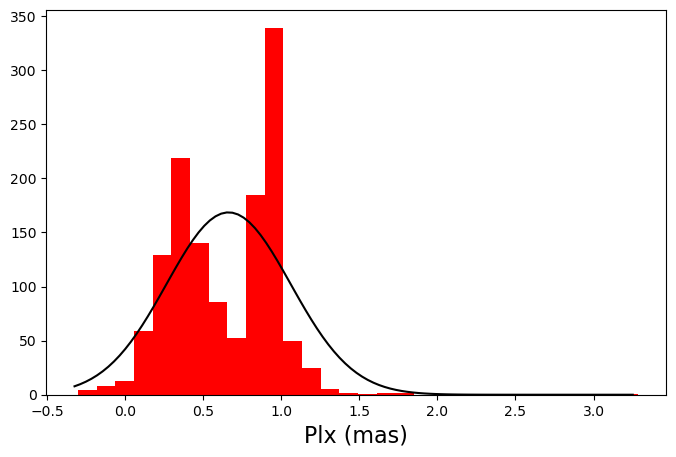

In [58]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population["Plx_corr"][paralaxe_sel],30, color="red")
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus1, 'k')
#ax.plot(x_plx, gaus1, 'k',label=r"$\mu_1 = 1.24$, $\sigma_1= 0.000992$ ")
#ax.axvline
#ax.axhline
#plt.gca().invert_xaxis()
#fig.legend(fontsize=13,bbox_to_anchor=(0.5, 0.88))
#plt.savefig("hist_Mvt.png", dpi=150)

In [55]:
#saving the final table with the cluster's population
#ascii.write(population, 'ngc1027_preanalysis.csv', format='csv', fast_writer=False, overwrite=True)  